In [ ]:
!pip install kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from google.colab import drive  #mounting the google drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!mkdir /root/.kaggle  # creating a kaggle directory in the root folder, transfer the kaggle.json file in this folder 

In [ ]:
!cp /content/drive/MyDrive/kaggle.json /root/.kaggle/kaggle.json

In [ ]:
!chmod 600 /root/.kaggle/kaggle.json # set the permissions 

In [ ]:
!mkdir /content/drive/MyDrive/datasets # create a directory to store all the datasets in the Google drive

mkdir: cannot create directory ‘/content/drive/MyDrive/datasets’: File exists


In [ ]:
!kaggle datasets download moltean/fruits  #downloading the dataset from Kaggle 

 73% 959M/1.28G [00:04<00:01, 216MB/s]
User cancelled operation


In [ ]:
!unzip fruits -d /content/drive/MyDrive/datasets/fruits360  # unzipping the folder dowloaded


Archive:  fruits.zip
replace /content/drive/MyDrive/datasets/fruits360/fruits-360-original-size/fruits-360-original-size/Meta/apple_6/info.txt? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [ ]:
!ls /content/drive/MyDrive/datasets/fruits360/fruits-360_dataset/fruits-360  # exploring what's inside the folder 

LICENSE  papers  readme.md  Test  test-multiple_fruits	Training


In [ ]:
import tensorflow as tf
from collections import Counter
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.resnet50 import ResNet50, preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix
import numpy as np
import matplotlib.pyplot as plt

from glob import glob
import itertools
import warnings
warnings.filterwarnings("ignore")

In [ ]:
import os
os.listdir('/content/drive/MyDrive/datasets/fruits360/fruits-360_dataset/fruits-360/Training') # checking the training folder

['Apple Braeburn',
 'Apple Crimson Snow',
 'Apple Golden 1',
 'Apple Golden 2',
 'Apple Golden 3',
 'Apple Granny Smith',
 'Apple Pink Lady',
 'Apple Red 1',
 'Apple Red 2',
 'Apple Red 3',
 'Apple Red Delicious',
 'Apple Red Yellow 1',
 'Apple Red Yellow 2',
 'Apricot',
 'Avocado ripe',
 'Banana Lady Finger',
 'Banana Red',
 'Banana',
 'Beetroot',
 'Blueberry',
 'Cactus fruit',
 'Cantaloupe 1',
 'Cantaloupe 2',
 'Carambula',
 'Cauliflower',
 'Cherry 1',
 'Cherry Rainier',
 'Cherry Wax Black',
 'Cherry Wax Red',
 'Cherry Wax Yellow',
 'Chestnut',
 'Clementine',
 'Cocos',
 'Corn Husk',
 'Corn',
 'Cucumber Ripe 2',
 'Cucumber Ripe',
 'Dates',
 'Eggplant',
 'Ginger Root',
 'Granadilla',
 'Grape Blue',
 'Grape Pink',
 'Grape White 2',
 'Grape White 3',
 'Grape White 4',
 'Grape White',
 'Grapefruit Pink',
 'Grapefruit White',
 'Guava',
 'Hazelnut',
 'Huckleberry',
 'Kaki',
 'Kiwi',
 'Kohlrabi',
 'Kumquats',
 'Lemon Meyer',
 'Lemon',
 'Limes',
 'Lychee',
 'Mandarine',
 'Mango Red',
 'Mango'

In [ ]:
os.listdir('/content/drive/MyDrive/datasets/fruits360/fruits-360_dataset/fruits-360/Test')  #checking the test folder

['Apple Braeburn',
 'Apple Crimson Snow',
 'Apple Golden 1',
 'Apple Golden 2',
 'Apple Golden 3',
 'Apple Granny Smith',
 'Apple Pink Lady',
 'Apple Red 1',
 'Apple Red 2',
 'Apple Red 3',
 'Apple Red Delicious',
 'Apple Red Yellow 1',
 'Apple Red Yellow 2',
 'Apricot',
 'Avocado ripe',
 'Banana Lady Finger',
 'Banana Red',
 'Banana',
 'Beetroot',
 'Blueberry',
 'Cactus fruit',
 'Cantaloupe 1',
 'Cantaloupe 2',
 'Carambula',
 'Cauliflower',
 'Cherry 1',
 'Cherry Rainier',
 'Cherry Wax Black',
 'Cherry Wax Red',
 'Cherry Wax Yellow',
 'Chestnut',
 'Clementine',
 'Cocos',
 'Corn Husk',
 'Corn',
 'Cucumber Ripe 2',
 'Cucumber Ripe',
 'Dates',
 'Eggplant',
 'Ginger Root',
 'Granadilla',
 'Grape Blue',
 'Grape Pink',
 'Grape White 2',
 'Grape White 3',
 'Grape White 4',
 'Grape White',
 'Grapefruit Pink',
 'Grapefruit White',
 'Guava',
 'Hazelnut',
 'Huckleberry',
 'Kaki',
 'Kiwi',
 'Kohlrabi',
 'Kumquats',
 'Lemon Meyer',
 'Lemon',
 'Limes',
 'Lychee',
 'Mandarine',
 'Mango Red',
 'Mango'

In [ ]:
#Setting Training & Test dir paths
train_path_initial = '/content/drive/MyDrive/datasets/fruits360/fruits-360_dataset/fruits-360/Training/' 

valid_path_initial = '/content/drive/MyDrive/datasets/fruits360/fruits-360_dataset/fruits-360/Test/'


In [ ]:
# calculating the top 20 classes 

classes = []
fruit_item = []
for i in os.listdir(train_path_initial):
  for image_filename in os.listdir(train_path_initial+i):
    classes.append(i)
    fruit_item.append(i+'/'+ image_filename)

count = Counter(classes)
most_frequent = count.most_common(20)
print("Top 20 frequent Fruits:")
most_frequent

Top 20 frequent Fruits:


[('Grape Blue', 984),
 ('Plum 3', 900),
 ('Cherry Rainier', 738),
 ('Melon Piel de Sapo', 738),
 ('Peach 2', 738),
 ('Strawberry Wedge', 738),
 ('Pear Stone', 711),
 ('Cauliflower', 702),
 ('Pear Forelle', 702),
 ('Pepper Orange', 702),
 ('Pear 2', 696),
 ('Apple Red Yellow 2', 672),
 ('Pear Red', 666),
 ('Pepper Red', 666),
 ('Pepper Yellow', 666),
 ('Nut Forest', 654),
 ('Nut Pecan', 534),
 ('Pineapple Mini', 493),
 ('Apple Braeburn', 492),
 ('Apple Golden 2', 492)]

In [ ]:
# re-size all the images to this
IMAGE_SIZE = [100, 100]

# training config:
epochs = 10
batch_size = 32

In [ ]:
# setting new reduced training and test paths
train_path = '/content/drive/MyDrive/datasets/fruits360/fruits-360_dataset/fruits-360/Training/Training2/' 
valid_path = '/content/drive/MyDrive/datasets/fruits360/fruits-360_dataset/fruits-360/Test/Test2/'

In [ ]:
os.listdir('/content/drive/MyDrive/datasets/fruits360/fruits-360_dataset/fruits-360/Training/Training2')  

['Avocado', 'Cherry 2', 'Fig', 'Tomato 1', 'Tomato 2']

In [ ]:
os.listdir('/content/drive/MyDrive/datasets/fruits360/fruits-360_dataset/fruits-360/Test/Test2')

['Avocado', 'Cherry 2', 'Fig', 'Tomato 1', 'Tomato 2']

In [ ]:
# getting number of files
image_files = glob(train_path + '/*/*.jp*g')
valid_image_files = glob(valid_path + '/*/*.jp*g')

In [ ]:
folders = glob(train_path + '/*')

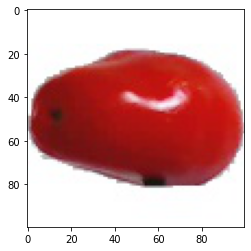

In [ ]:
# look at a random image
plt.imshow(image.load_img(np.random.choice(image_files)));

In [ ]:
# Data Augmentation of ImageDataGenerator

train_gen = ImageDataGenerator(
  rotation_range= 40,
  width_shift_range=0.5,
  height_shift_range=0.1,
  shear_range=0.2,
  zoom_range=0.1,
  horizontal_flip=True,
  vertical_flip=True,
  preprocessing_function=preprocess_input)

val_gen = ImageDataGenerator(
  preprocessing_function=preprocess_input
)

In [ ]:
# creating generators
train_generator = train_gen.flow_from_directory(
  train_path,
  target_size=IMAGE_SIZE,
  shuffle=True,
  batch_size=batch_size,
  class_mode='sparse',
)
valid_generator = val_gen.flow_from_directory(
  valid_path,
  target_size=IMAGE_SIZE,
  shuffle=False,
  batch_size=batch_size,
  class_mode='sparse',
)

Found 3211 images belonging to 5 classes.
Found 1094 images belonging to 5 classes.


In [ ]:
# Uploading ResNet50 and then applying some output layers
pretrained_model= tf.keras.applications.ResNet50(include_top=False,
                   input_shape=(100, 100, 3),
                   weights='imagenet')

for layer in pretrained_model.layers:
        layer.trainable=False

model = tf.keras.models.Sequential([    
    pretrained_model,
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Dense(131,activation='softmax')
])
model.summary()

94765736/94765736 [==============================] - 1s 0us/step
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 4, 4, 2048)        23587712  
                                                                 
 flatten (Flatten)           (None, 32768)             0         
                                                                 
 dense (Dense)               (None, 64)                2097216   
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 131)               8515      
                                                                 
Total params: 25,693,443
Trainable params: 2,105,731
Non-trainable params: 23,587,712
_____________________________________

In [ ]:
# tell the model what cost and optimization method to use
model.compile(
  loss='sparse_categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy'])

In [ ]:
# defining a callback function to stop the model 
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self,epoch,logs={}):
    if(logs['accuracy']>=0.99):
      self.model.stop_training=True

callbacks=myCallback()

# fitting the model
hist = model.fit(
  train_generator,
  validation_data=valid_generator,
  epochs=epochs,
  steps_per_epoch=len(image_files) // batch_size,
  validation_steps=len(valid_image_files) // batch_size,
  callbacks = [callbacks],
)

Epoch 1/10
100/100 [==============================] - 1153s 12s/step - loss: 0.5020 - accuracy: 0.8953 - val_loss: 0.0077 - val_accuracy: 1.0000
Epoch 2/10
100/100 [==============================] - 199s 2s/step - loss: 0.1445 - accuracy: 0.9623 - val_loss: 5.7669e-04 - val_accuracy: 1.0000
Epoch 3/10
100/100 [==============================] - 204s 2s/step - loss: 0.1066 - accuracy: 0.9726 - val_loss: 0.0011 - val_accuracy: 1.0000
Epoch 4/10
100/100 [==============================] - 207s 2s/step - loss: 0.1039 - accuracy: 0.9714 - val_loss: 0.0088 - val_accuracy: 0.9954
Epoch 5/10
100/100 [==============================] - 205s 2s/step - loss: 0.0564 - accuracy: 0.9846 - val_loss: 1.4298e-07 - val_accuracy: 1.0000
Epoch 6/10
100/100 [==============================] - 201s 2s/step - loss: 0.0558 - accuracy: 0.9821 - val_loss: 6.4169e-06 - val_accuracy: 1.0000
Epoch 7/10
100/100 [==============================] - 204s 2s/step - loss: 0.0447 - accuracy: 0.9893 - val_loss: 0.0288 - val_ac

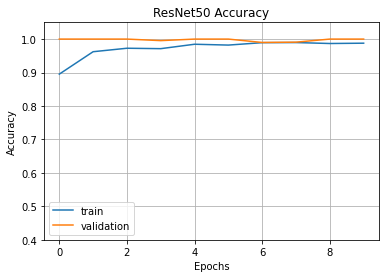

In [ ]:
#accuracy plot
plt.plot(hist.history['accuracy'], label='train accuracy')
plt.plot(hist.history['val_accuracy'], label='val accuracy')
plt.axis(ymin=0.4,ymax=1.05)
plt.grid()
plt.title('ResNet50 Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'validation'])
plt.show()


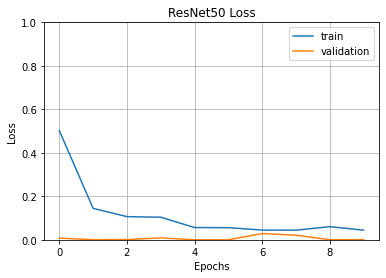

In [ ]:
# loss plot
plt.plot(hist.history['loss'], label='train loss')
plt.plot(hist.history['val_loss'], label='val loss')
plt.axis(ymin=0,ymax=1)
plt.grid()
plt.title('ResNet50 Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'validation'])
plt.show()

In [ ]:
model.save('fruits-360_dataset/fruits-360')

In [ ]:
model.evaluate(valid_generator)

35/35 [==============================] - 49s 1s/step - loss: 5.2285e-04 - accuracy: 1.0000


In [ ]:
from tensorflow import keras
model = keras.models.load_model('fruits-360_dataset/fruits-360')